In [2]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.feature import hog

In [4]:
path_dataset = '/home/hyunjoon/dataset/cifar-10-images'
list_fn = [l for l in os.listdir(path_dataset) if l.endswith('.jpg')]

In [5]:
# let's just read all the images
all_imgs = [cv2.imread(os.path.join(path_dataset, fn)) for fn in list_fn]

In [23]:
rand_idx = np.random.choice(np.arange(60000), 50, replace=False)

In [25]:
sorted_all = []
for idx in rand_idx:
    p_img = all_imgs[idx]
    ssim_pivot = [ssim(p_img, img, win_size=9, multichannel=True) for img in all_imgs]
    sorted_all.append(np.sort(ssim_pivot)[::-1])
    print(idx)

57477
59773
31274
32421
43386
59404
16052
27487
43111
57864


In [11]:
ssim_pivot = [ssim(p_img, img, win_size=9, multichannel=True) for img in all_imgs]

In [13]:
sorted = np.sort(ssim_pivot)[::-1]

In [14]:
sorted[:10]

array([1.        , 0.48653143, 0.4621323 , 0.44761223, 0.44643666,
       0.43705602, 0.42351062, 0.4209155 , 0.41945438, 0.41199909])

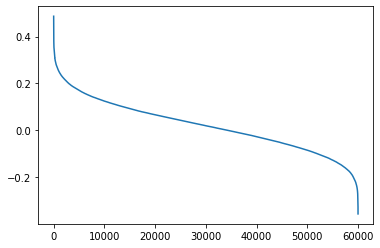

In [17]:
plt.plot(sorted[1:])

In [7]:
len(hog(all_imgs[100]))

324

In [31]:
all_hog = [hog(img, pixels_per_cell=(2, 2), multichannel=True) for img in all_imgs]

In [35]:
p_hog = all_hog[0]
sims_hog = [np.sum(p_hog * h) / 196 for h in all_hog]
sims_hog[0]

0.9999999997958355

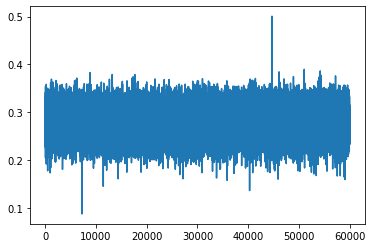

In [36]:
plt.plot(sims_hog[1:])

In [37]:
sims_hog[0]

0.9999999997958355

In [38]:
np.sort(sims_hog)[-100:]

array([0.35683722, 0.35685453, 0.35685905, 0.35693231, 0.35698681,
       0.35699464, 0.35699653, 0.35704214, 0.35705314, 0.35708642,
       0.3572694 , 0.35742229, 0.35747414, 0.35755973, 0.35767959,
       0.35771087, 0.35772038, 0.3578711 , 0.35794497, 0.3582284 ,
       0.35825332, 0.3582619 , 0.35828423, 0.35842506, 0.35853338,
       0.35859669, 0.35859739, 0.35877183, 0.35880071, 0.35881875,
       0.35882731, 0.35892032, 0.3589216 , 0.35899613, 0.35925825,
       0.35930385, 0.35934536, 0.35944176, 0.35948656, 0.35982777,
       0.35993037, 0.36000448, 0.36006539, 0.36009345, 0.36012587,
       0.36038184, 0.36038842, 0.36044498, 0.36088961, 0.36093976,
       0.36122141, 0.36139971, 0.3616307 , 0.36181401, 0.3618778 ,
       0.36189578, 0.36199508, 0.36208436, 0.36277396, 0.36313639,
       0.36316785, 0.36342897, 0.36427643, 0.36450153, 0.3649565 ,
       0.36512436, 0.36541066, 0.36542838, 0.36559308, 0.36572896,
       0.36574235, 0.36578998, 0.36626372, 0.36637701, 0.36717